# Исследование вакансий HH.ru 
------------------------------------------------------------------------------------------------------

**Цель проекта:** 

*Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.*

**Задачи проекта:**

1. [Предобработка данных](#Предобработка-данных)
2. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
  - [Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом](#Выявление-грейда-требуемых-специалистов-по-названию-вакансии-или-по-колонке-с-требуемым-опытом)
  - [Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик](#Определение-доли-грейдов-Junior-Junior+-Middle-Senior-среди-вакансий-Аналитик-данных-и-Системный-аналитик)
  - [Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы](#Определение-типичного-места-работы-для-Аналитика-данных-и-Системного-аналитика-по-следующим-параметрам:-ТОП-работодателей-заработная-плата-тип-занятости-график-работы)
  - [Определить, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше](#Определить-какие-навыки-спрашивают-чаще---твердые-или-мягкие-К-какому-грейду-и-к-какой-специальности-требований-больше)
  - [Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skills, самые важные soft-skills](#Определение-наиболее-желаемых-кандидатов-на-вакансии-Аналитик-данных-и-Системный-аналитик-по-следующим-параметрам:-самые-важные-hard-skills-самые-важные-soft-skills)
3. [Формулирование выводов и рекомендаций](#Формулирование-выводов-и-рекомендаций)

**Описание данных:**

*Таблицы:*

1. `vacancies_sa.xlsx` - таблица с вакансиями на ситсемного аналитика,
2. `vacancies_da-1.csv` - талица с вакансиями на аналитика данных

*Столбцы*

- `id` - Уникальный идентификатор вакансии.
- `name` - Название вакансии.
- `published_at` - Дата публикации.
- `alternate_url` - Ссылка на вакансию.
- `type` - Статус вакансии на момент получения данных от api и передачи их в базу.
- `employer` - Работодатель.
- `department` - Работодатель, отдел.
- `area` - Регион места работы.
- `experience` - Требуемый опыт работы.
- `key_skills` - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
- `schedule` - График работы.
- `employment` - Тип занятости.
- `description` - Описание вакансии.
- `description_lemmatized` - Лемматизированное описание вакансии.
- `salary_from` - Нижняя граница предлагаемой заработной платы.
- `salary_to` - Верхняя граница предлагаемой заработной платы.
- `salary_bin` - Категория зарплаты.
- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills.
- `hard_skills_from_description` - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. 
- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.


**Введение:**
У нас есть две таблицы с данными сервиса [hh.ru](https://hh.ru/), одного из самых популярных сайтов по поиску работы в России и странах СНГ. В первой таблицы содержится вся информация по размещенным вакансиям на должность "Системный аналитик",  во второй таблице информация по вкансиям на Аналитика данных. Каждая размещенная ваканчия предполагает наличие требований к кандитам, (ожидаемый) грейд специалиста, график работы, зарпатная "вилка" и так далее. На основании этих данных мы будем находить четкие отличия в требованиях или условиях для кандидатов на две разные должности.

## Предобработка данных


### Общая информация о данных

Первым делом **подключим все необходимые библиотеки**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sqlite3
import re
import gdown

Загружаем необходимые таблицы

In [2]:
sis_an_id = '1s9PAR59lP5ZRJC2iCJPDXRkoKdSwFy6z'
sis_an_url = 'https://drive.google.com/uc?id=' + sis_an_id

data_an_id = '1zR2iTaSSIga354SEuC8z0lcSaLrDi0cy'
data_an_url = 'https://drive.google.com/uc?id=' + data_an_id

# Чтение Excel файла с помощью pandas
sis_an = pd.read_excel(sis_an_url, engine='openpyxl')
data_an = pd.read_excel(data_an_url, engine='openpyxl')

Выведем первые пять строк и основную информацию об обеих таблицах

In [3]:
display(sis_an.head())
display(data_an.head())

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
display(sis_an.info())
print(f'Количество строк в первой таблице = {len(sis_an)}')
print()
display(data_an.info())
print(f'Количество строк во второй таблице = {len(data_an)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

None

Количество строк в первой таблице = 1915

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedu

None

Количество строк во второй таблице = 1801


### Устранение ошибок

Первая ошибка это различия типов данных в столбцах `published_at`, приведем столбцы к общему типу.

In [5]:
data_an['published_at'] = pd.to_datetime(data_an['published_at'], format='%Y-%m-%d %H:%M:%S')
#data_an.info()

В обеих таблицах, каждая вакансия имеет уникальное название, это может создать сложность в процессе исследовательского анализа если мы заходим проводить сравнение показателей аналитиков данных и системных аналитиков. Дадим для каждой вакансии четкое указание к какой группе вакансий она относится.

In [6]:
data_an['vac_group'] = 'Аналитик данных'
sis_an['vac_group'] = 'Системный аналитик'

display(data_an.head())
display(sis_an.head())

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_group
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Аналитик данных
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,Аналитик данных
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Аналитик данных
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,Аналитик данных
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,Аналитик данных


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_group
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,Системный аналитик
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,Системный аналитик
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация,Системный аналитик
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",...,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,Системный аналитик
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",...,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,Системный аналитик


Мы создали в каждой таблице столбец с указанием профессии.

Объединим таблицы прежде чем присутпать к поиску дубликатов. Соединим таблицу с помощью SQL запроса.

In [7]:
conn = sqlite3.connect('vacancies.bd')
sis_an.to_sql('sis_an', conn, if_exists='replace', index=False)
data_an.to_sql('data_an', conn, if_exists='replace',index=False)

query = """
SELECT *
FROM sis_an
UNION ALL
SELECT *
FROM data_an
"""

data = pd.read_sql_query(query, conn)
display(data.info())
print(len(data))
#display(data.head(10))
#display(data.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3716 non-null   int64  
 1   name                              3716 non-null   object 
 2   published_at                      3716 non-null   object 
 3   alternate_url                     3716 non-null   object 
 4   type                              3716 non-null   object 
 5   employer                          3716 non-null   object 
 6   department                        882 non-null    object 
 7   area                              3716 non-null   object 
 8   experience                        3716 non-null   object 
 9   key_skills                        3716 non-null   object 
 10  schedule                          3716 non-null   object 
 11  employment                        3716 non-null   object 
 12  descri

None

3716


### Поиск дубликатов

Таблицы успешно объединены, можно приступать к поиску дубликатов:
сначала рассмотрим количество явных дубликатов в таблице.

In [8]:
print(f' Количество явных дубликатов в таблице = {data.duplicated().sum()}')

 Количество явных дубликатов в таблице = 0


Явных дубликатов нет, однако при слиянии таблиц могли возникнуть повторения строк, рассмотрим их количество по уникальным значениям каждой строки, то есть по `id`

In [9]:
print(f"Количество уникальных значений id в таблице = {len(data['id'].unique())}")
print(f"Количество строк в таблице = {len(data['id'])}")

Количество уникальных значений id в таблице = 3711
Количество строк в таблице = 3716


Количество строк в таблице превышает количество уникальных значения каждой строки, что говорит нам о наличии неявных дубликатов.

In [10]:
data['id'].value_counts().head(6)

id
100581829    2
100581830    2
98441008     2
85053195     2
100581831    2
94313938     1
Name: count, dtype: int64

Выведем строки из таблицы по установленным `id`.

In [11]:
dublicate_id = [100581829, 100581830, 98441008, 85053195, 100581831]
display(data[data['id'].isin(dublicate_id)])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_group
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,None,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Системный аналитик
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,None,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,None,confluence,Документация,Системный аналитик
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,None,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,None,confluence,Документация,Системный аналитик
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),None,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",None,Документация,Системный аналитик
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,None,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",None,None,Системный аналитик
2017,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,None,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,Аналитик данных
2018,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,None,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,None,confluence,Документация,Аналитик данных
2019,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,None,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,None,confluence,Документация,Аналитик данных
2259,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),None,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",None,Докумен

Как мы можем видеть эти строки действительно можно назвать дубликатами, так как различия в них только в столбце с информцией о дате публикации объявления. Приступим к удалению этих строк, удалить можно все 10 строк это не повлияет на результаты, поскольку доля от общего количества строк составляет всего 0.27%.

In [12]:
dublicate_indexes = data[data['id'].isin(dublicate_id)].index
data.drop(index=dublicate_indexes, inplace=True)
display(data['id'].value_counts().head(6))
print(f"Количество уникальных значений id в таблице = {len(data['id'].unique())}")
print(f"Количество строк в таблице = {len(data['id'])}")

id
100046399    1
94097295     1
94111033     1
94121794     1
94188877     1
94193291     1
Name: count, dtype: int64

Количество уникальных значений id в таблице = 3706
Количество строк в таблице = 3706


Мы удалили строки дубликаты (вместе с 5 уникальными строками), стоит также рассмотреть строки дубликаты по совпадениям в других столбцах. `name`, `type`, `employer`, `department`, `area`, `experience`, `schedule`, `key_skills_from_key_skills_field`, `hard_skills_from_description`,	`soft_skills_from_description`

In [13]:
# Строки дубликаты по совпадениям в нескольких столбцах
duplicate = data[
    data.duplicated(
        subset=
        ['name',
        'type',
        'employer',
        'department', 
        'area',
        'experience',
        'schedule', 
        'key_skills_from_key_skills_field', 
        'hard_skills_from_description',
        'soft_skills_from_description'], keep=False)
]

# количество дублирующих строк
duplicate_counts = data.groupby([
'name',
'type',
'employer',
'department',
'area',
'experience',
'schedule',
'key_skills_from_key_skills_field',
'hard_skills_from_description',
'soft_skills_from_description'
]).size().reset_index(name='count')
duplicate_counts = duplicate_counts[duplicate_counts['count'] > 1]

display(duplicate_counts)

,name,type,employer,department,area,experience,schedule,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,count
3,Middle+/Senior Data Analyst в Data Accelerator,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),Удаленная работа,"Python, SQL, A/B тесты","Pandas, confluence",Документация,3
16,Ведущий аналитик данных,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),Полный день,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,2


Эти дубликаты также удалим.

In [14]:
# Фильтруем только те группы, у которых больше одного дубликата
duplicates_to_remove = duplicate_counts[duplicate_counts['count'] > 1]

# Удаляем дубликаты
data = data[~data.set_index([
    'name', 
    'type', 
    'employer', 
    'department', 
    'area', 
    'experience', 
    'schedule', 
    'key_skills_from_key_skills_field', 
    'hard_skills_from_description', 
    'soft_skills_from_description'
]).index.isin(duplicates_to_remove.set_index([
    'name', 
    'type', 
    'employer', 
    'department', 
    'area', 
    'experience', 
    'schedule', 
    'key_skills_from_key_skills_field', 
    'hard_skills_from_description', 
    'soft_skills_from_description'
]).index)]

print(f'Длина датафрейма после удаления дубликатов = {len(data)}')

Длина датафрейма после удаления дубликатов = 3701


### Исследование пропусков

После удаления основного количества дубликатов мы перейдем к поиску и устранению пропусков

In [15]:
data.isna().sum() # количество пропусков в каждом столбце таблицы

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          2824
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         3003
salary_to                           3194
salary_bin                             0
key_skills_from_key_skills_field    1345
hard_skills_from_description        2724
soft_skills_from_description        1699
vac_group                              0
dtype: int64

Мы видим большое количество пропусков в следующих столбцах: 
- `department`,
- `salary_from`,
- `salary_to`,
- `key_skills_from_key_skills_field`,
- `hard_skills_from_description`,
- `soft_skills_from_description`

1. В столбце `department` указана информация о работодателе или об отделе в котором предстоит работать кандидату. Данный столбец логично будет **удалить** из таблицы, так как идентичная (в большинстве случаев совпадающая) информация соджержится в столбце `employer`, который в свою очередь пропусков не имеет.
2. Пропуски в столбцах `salary_from` и `salary_to` можно заполнить с помощью создания категорий зарплат по другому столбцу, содержащему информацию о предполагаемых зарплатах кандидатов. В случае если это сделать не удастся, стоит рассматриваить этот аспект детальнее.
3. Пропуски в столбцах `key_skills_from_key_skills_field`, `hard_skills_from_description`, `soft_skills_from_description` можно заполнить значениями из поля `description` или удалить два последних столбца, если их информация будет содерждаться в поле `key_skills_from_key_skills_field`.

In [16]:
# 1 удаляем столбец department
data = data.drop('department', axis=1)
data = data.reset_index()
#data.info()

Что бы заполнить данные в столбцах с зарплатой нужно расмотреть показатели в другом столбце. В `salary_bin` есть четкие группы на которые разбиты вакансии.

In [17]:
print(data['salary_bin'].unique()) # уникальные названия групп в salary_bin
print(data['salary_bin'].value_counts()) # количество строк по группам

['ЗП не указана' 'От 100 тысяч до 200 тысяч' 'Меньше 100 тысяч'
 'Больше 300 тысяч' 'От 200 тысяч до 300 тысяч']
salary_bin
ЗП не указана                3194
От 100 тысяч до 200 тысяч     171
От 200 тысяч до 300 тысяч     117
Больше 300 тысяч              110
Меньше 100 тысяч              109
Name: count, dtype: int64


Однако, данных из этого столбца мало, не смотря на отсутсвие пропусков, большая часть строк отнесена к группе "ЗП не указана". Значит прийдется прибегнуть к другом способу заполнения пропусков. Но для решения поставленных задач нам это пока не нужно, поэтому рассмотрим к заполнению другие столбцы: `key_skills`, `key_skills_from_key_skills_fielt`, `hard_skills_from_description` и  `soft_skills_from_description`.

In [18]:
# Рассмотрим значеня в столбцах со скилами
print(data['key_skills'].unique())
print(len(data['key_skills'].unique()))
print('-' * 100)
print(data['hard_skills_from_description'].unique())
print(len(data['hard_skills_from_description'].unique()))
print('-' * 100)
print(data['soft_skills_from_description'].unique())
print(len(data['soft_skills_from_description'].unique()))

["['1С', 'Аналитический склад ума', 'confluence', 'SQL']"
 "['Разработка технических заданий', 'Бизнес-анализ', 'Английский язык', 'REST', 'Atlassian Jira', 'Сбор и анализ информации', 'Документация', 'Деловая коммуникация', 'UML', 'BPMN', 'API', 'Системный анализ', 'Atlassian Confluence']"
 "['Документация']" ... "['Python', 'SQL', 'PostgreSQL']"
 "['Внутренний контроль', 'Внутренний аудит информационных систем', 'Контрольно-аналитические проверки', 'Работа с базами данных', 'Аналитическое мышление']"
 "['Анализ данных', 'SQL', 'MS Power BI', 'Python', 'Data Analysis', 'Аналитика', 'Tableau']"]
1892
----------------------------------------------------------------------------------------------------
['confluence' None 'confluence, Юнит-экономика' 'Юнит-экономика' 'Pandas'
 'Pandas, confluence' 'Google Sheets' 'Pandas, Google Sheets'
 'Pandas, Юнит-экономика' 'Математическая статистика']
10
-------------------------------------------------------------------------------------------------

Мы видим, что в ряде столбцов данные сохраненны не в нужном нам формате. Из-за подобной записи значений, в столбце `key_skills` есть пропуски, которые не указаны типом NoneType, а значит не попали в подсчет пропусков. Исправим формат записи значений в столбце `key_skills`, что бы подсчитать количество пропусков. Такие столбцы как `key_skills_from_key_skills_field`,`hard_skills_from_description`,`soft_skills_from_description`мы удалим из датафрейма по причинам неудобного формата и большого количества пропусков, создадим два новых новых столбца с данными о `hard_skills` и `soft_skills` на основе значений из столбца `key_skills`.

In [19]:
# Изменим формат записи в столбце `key_skills`
import ast

def convert_str(skills_str):
    try:
        # Преобразуем строку в список, используя ast.literal_eval
        skills_list = ast.literal_eval(skills_str)
        # Соединяем элементы списка в строку через запятую и пробел
        return ', '.join(skills_list)
    except (ValueError, SyntaxError):
        # Если возникла ошибка при преобразовании, вернем оригинальную строку
        return skills_str

# Применяем функцию ко всем элементам столбца key_skills
data['key_skills'] = data['key_skills'].apply(convert_str)
data['key_skills']

0            1С, Аналитический склад ума, confluence, SQL
1       Разработка технических заданий, Бизнес-анализ,...
2                                            Документация
3       ERP, Atlassian Jira, 1С: Управление Производст...
4           JSON, SQL, XML, SOAP, HTML, JS, Java, CSS, C#
                              ...                        
3696    Проактивность, Коммуникация, SQL, ad-hoc, A/B ...
3697    Грамотная речь, Сводные таблицы, Сбор и анализ...
3698    Анализ данных, SQL, MS Power BI, Python, Data ...
3699    Анализ данных, SQL, MS Power BI, Python, Data ...
3700    Анализ данных, SQL, MS Power BI, Python, Data ...
Name: key_skills, Length: 3701, dtype: object

Теперь в `key_skills` более привычная форма записи, можно приступить к поиску количества пропусков.

In [20]:
len(data[data['key_skills']==''])

512

Пропуски в столбце `key_skills` ровно 512 строк, это около 13% от общего массива, это значение не велико, так что особого влияния на показатели это иметь не будет. Удалим эти строки. Также удалим столбцы `key_skills_from_key_skills_field`,`hard_skills_from_description` и `soft_skills_from_description`.

In [21]:
data.drop('key_skills_from_key_skills_field', axis=1, inplace=True)
data.drop('hard_skills_from_description', axis=1, inplace=True)
data.drop('soft_skills_from_description', axis=1, inplace=True)
data = data.reset_index()
data = data[data['key_skills']!=''] # сохраняем строки без пропусков
data.count()

level_0                   3189
index                     3189
id                        3189
name                      3189
published_at              3189
alternate_url             3189
type                      3189
employer                  3189
area                      3189
experience                3189
key_skills                3189
schedule                  3189
employment                3189
description               3189
description_lemmatized    3189
salary_from                625
salary_to                  460
salary_bin                3189
vac_group                 3189
dtype: int64

Можно приступать к созданию двух новых столбцов с информацией о скилах кандидатов.

In [22]:
# Предположительные списки hard и soft skills
hard_skills = {'1с', 'confluence', 'ms sql', 'sql', 'python', 'jira', 'excel', 
    'json', 'xml', 'soap', 'html', 'js', 'java', 'css', 'c#', 
    'ms power bi', 'a/b-тесты', 'atlassian jira', 'юнит-экономика',
    'tableau', 'data lens', 'owox bi', 'ad-hoc', 'api', 'статистика',
    'pandas', 'matplotlib', 'seaborn', 'git', 'uml', 'bpmn', 'unified modeling language', 
    'agile', 'business process model and notation', 'scrum', 'waterfall', 
    'основы автоматизации', 'анализ данных', 'data analysis', 'scikit-learn',
    'tensorflow', 'pytorch', 'apache hadoop', 'apache spark', 'casandra', 'datemine',
    'auto cad', 'цфт', 'postgresql', 'rest', 'знание бд', 'системный анализ'}
soft_skills = {'аналитический склад ума', 'коммуникабельность', 'дедлайны', 
    'умение работать в команде', 'критическое мышление', 'проактивность', 
    'грамотная речь', 'ответственность', 'навыки управления', 
    'управление рисками', 'работоспособность', 'навыки лидерства', 
    'лидерские качества', 'организационные навыки', 'документация',
    'переговоры', 'креативность', 'тайм-менеджмент', 'коммуникация',
    'стрессоустойчивость', 'аналитическое мышление'}

# Функция для разделения строки на список навыков
def split_skills(skills_str, delimiter=','):
    if pd.isna(skills_str):
        return []
    return [skill.strip().lower() for skill in skills_str.split(delimiter)]

# Разделение навыков в DataFrame
data['key_skills_list'] = data['key_skills'].apply(split_skills)

# Функция для классификации навыков
def classify_skills(skills_list, hard_skills, soft_skills):
    hard = []
    soft = []
    for skill in skills_list:
        if skill in hard_skills:
            hard.append(skill)
        elif skill in soft_skills:
            soft.append(skill)
    return hard, soft

# Применение функции классификации
data['hard_skills'], data['soft_skills'] = zip(*data['key_skills_list'].apply(lambda x: classify_skills(x, hard_skills, soft_skills)))
data.drop('key_skills_list', axis=1, inplace=True)

# заполнение пустых и пропущенных значений
data['hard_skills'] = data['hard_skills'].apply(lambda x: x if x else None)
data['soft_skills'] = data['soft_skills'].apply(lambda x: x if x else None)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 0 to 3700
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level_0                 3189 non-null   int64  
 1   index                   3189 non-null   int64  
 2   id                      3189 non-null   int64  
 3   name                    3189 non-null   object 
 4   published_at            3189 non-null   object 
 5   alternate_url           3189 non-null   object 
 6   type                    3189 non-null   object 
 7   employer                3189 non-null   object 
 8   area                    3189 non-null   object 
 9   experience              3189 non-null   object 
 10  key_skills              3189 non-null   object 
 11  schedule                3189 non-null   object 
 12  employment              3189 non-null   object 
 13  description             3189 non-null   object 
 14  description_lemmatized  3189 non-null   objec

Мы смогли заполнить большую часть пропусков в столбцах `hard_skills` и `soft_skills`.


**ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:**
- мы изменили тип значений в столбце с датой публикацией вакансии
- мы соединили таблицы в один общий датафрейм
- мы удалили неявные дубликаты в таблице (явные дубликаты  таблице не обнаружены)
- мы удалили и заполнили пропуски в основных столбцах
- мы удалили столбцы с большим количеством пропусков
- мы создали два новых столбца с группировкой основных навыков к кандидатам в вакансиях

Можно приступать к следующему этапу исследования

## Исследовательский анализ данных

### 1. Выявление **грейда требуемых специалистов** по названию вакансии или по колонке с требуемым опытом.

In [23]:
# Создаем новый столбец с указанием грейда
data['grade'] = data['experience'].str.extract(r'(Junior\+|Junior|Middle|Senior)')

display(data.info())
data['grade'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 0 to 3700
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level_0                 3189 non-null   int64  
 1   index                   3189 non-null   int64  
 2   id                      3189 non-null   int64  
 3   name                    3189 non-null   object 
 4   published_at            3189 non-null   object 
 5   alternate_url           3189 non-null   object 
 6   type                    3189 non-null   object 
 7   employer                3189 non-null   object 
 8   area                    3189 non-null   object 
 9   experience              3189 non-null   object 
 10  key_skills              3189 non-null   object 
 11  schedule                3189 non-null   object 
 12  employment              3189 non-null   object 
 13  description             3189 non-null   object 
 14  description_lemmatized  3189 non-null   objec

None

array(['Middle', 'Junior+', 'Senior', 'Junior'], dtype=object)

Мы создали новый столбец в котором для каждой строки отобрали значение требуемого грейда из столбца `experience`.

### 2. Определение **доли грейдов** Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
 - Построим график распределения значений грейда

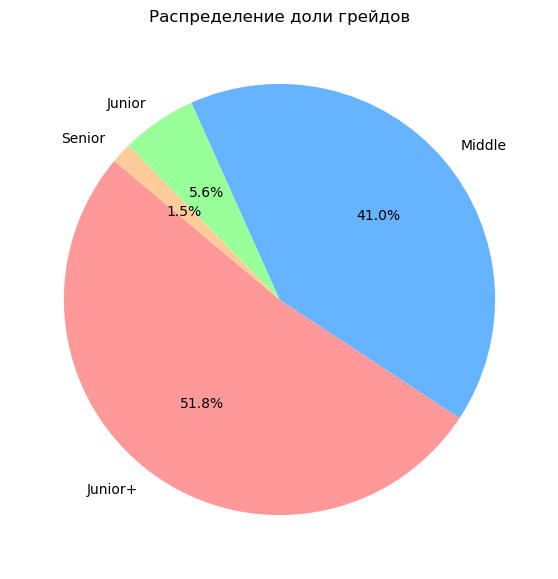

grade
Junior+    51.83
Middle     40.98
Junior      5.64
Senior      1.54
Name: proportion, dtype: float64

In [24]:
# распределение доли грейдов в процентах
grade_distribution = round(data['grade'].value_counts(normalize=True)*100, 2)

# визуализация распределения доли грейдов
plt.figure(figsize=(7, 7))
plt.pie(
	 grade_distribution, 
	 labels=grade_distribution.index, 
	 autopct='%1.1f%%', 
	 startangle=140, 
	 colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
)
plt.title('Распределение доли грейдов')
plt.show()
grade_distribution

**Вывод:** По графику распределения грейдов видно, что большую часть составляют вакансии для `Junior+`(52%) и `Middle`(41%), вакансии для `Junior` в сумме составили лишь 5.6% от общей массы вакансий. Минимальным по количеству вакансий стал грейд самых опытных представителей IT индустрии `Senior`, на них пришлось 1.5% вакансий.

Посмотррим на эти показатели сгруппировав их по названиям профессий (`vac_group`).

In [25]:
# Делим таблицу по `vac_group`
data_analyst = data[data['vac_group']== 'Аналитик данных']
sys_analyst = data[data['vac_group']=='Системный аналитик']

# Распределение доли грейдов среди аналитиков данных и системных аналитиков
grade_dis_data_an = round(data_analyst['grade'].value_counts(normalize=True)*100, 2)
grade_dis_sys_an = round(sys_analyst['grade'].value_counts(normalize=True)*100, 2)

# Построение диаграмм
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Аналитик данных', 'Системный аналитик'])
                                             

# Добавляем первую круговую диаграмму
fig.add_trace(go.Pie(labels=grade_dis_data_an.index,
                     values=grade_dis_data_an.values,
                     textinfo='label+percent',
					 hole= 0.4,
                     insidetextorientation='radial'),
              row=1, col=1)

# Добавляем вторую круговую диаграмму
fig.add_trace(go.Pie(labels=grade_dis_sys_an.index,
                     values=grade_dis_sys_an.values,
                     textinfo='label+percent',
					 hole= 0.4,
                     insidetextorientation='radial'),
              row=1, col=2)


# Настройка макета
fig.update_layout( 
    title_text='Распределение грейдов по группам вакансий',                           # заголовок
    title_x=0.5,
    title_y=0.9,  
    margin=dict(t=95),
    annotations=[
        dict(text='Аналитик данных', x=0.22, y=-0.3, xref='paper', yref='paper',
             showarrow=False, font=dict(size=14)),                                    # подзаголовок №1
        dict(text='Системный аналитик', x=0.77, y=-0.3, xref='paper', yref='paper',
             showarrow=False, font=dict(size=14))                                     # подзаголовок №2
    ]
)

# Отображене графика
fig.show()
#display(grade_dis_data_an)
#display(grade_dis_sys_an)

**Вывод:** Как и на прошлом графике, большинство вакансий предназначенны для специалистов с грейдом `Junior+` и `Middle`, отличие только в том что среди системных аналитиков специалистов с грейдами `Middle` и `Senior` ищут больше чем среди аналитиков данных. Также стоит заметить, что среди вакансий для аналитиков данных целых 7.5% приходится на кандидатов "без опыта" - `Junior`.

### 3. Определение **типичного места** работы для Аналитика данных и Системного аналитика по следующим параметрам: **ТОП-работодателей, зарплата, тип занятости, график работы**. *Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.*

#### Распределение по **ТОПу-работодателей**

In [26]:
# выделим ТОП-10 работодателей по количеству размещенных вакансий
top10_employer = data['employer'].value_counts().head(10).reset_index()

# построим визуализацию этого распределения
fig = px.bar(
    top10_employer, 
    x='employer', 
    y='count', 
    title='ТОП-10 работодателей по количеству размещенных вакансий', 
    color='employer',
    width=1150,
    height=600,
    labels={'employer':'Компании/Работодатели', 'count':'Количество размещ. вакансий'}
)
fig.update_xaxes(tickangle=45)
fig.update_layout(showlegend=False)

# выводим диаграмму
fig.show()

Также в этом пункте интересно посмотреть на эти данные в разрезе. Разделим общую таблицу вакансий на вакансии для аналитиков данных и для системных аналитиков.

In [27]:
# выделим топ-10 компаний по количеству размещенных вакансий для аналитиков данных
top_for_da = data[data['vac_group']=='Аналитик данных']['employer'].value_counts().head(10).reset_index()

# визуализруем распределение
fig = px.bar(
    top_for_da, 
    x='employer', 
    y='count', 
    title='ТОП-10 работодателей по количеству размещенных вакансий для аналитиков данных', 
    color='employer',
    width=1150,
    height=600,
    labels={'employer':'Компании/Работодатели', 'count':'Количество размещ. вакансий'}
)
fig.update_xaxes(tickangle=45)
fig.update_layout(showlegend=False)

# выводим диаграмму
fig.show()

In [28]:
# выделим топ-10 компаний по количеству размещенных вакансий для системных аналитиков
top_for_sa = data[data['vac_group']=='Системный аналитик']['employer'].value_counts().head(10).reset_index()

# визуализируем распределение
fig = px.bar(
    top_for_sa, 
    x='employer', 
    y='count', 
    title='ТОП-10 работодателей по количеству размещенных вакансий для системных аналитиков', 
    color='employer',
    width=1150,
    height=600,
    labels={'employer':'Компании/Работодатели', 'count':'Количество размещ. вакансий'}
)
fig.update_xaxes(tickangle=45)
fig.update_layout(showlegend=False)

# выводим диаграмму
fig.show()

Посмотрим, специалистов какого уровня в основном ищут компании из нашего ТОПа.

In [29]:
# выделим строки с вакансиями от компаний из топ-10
top_grades = data[data['employer'].isin(top10_employer['employer'])]
grades_by_comp = top_grades.groupby(['employer','grade'])['id'].count() # группируем по двум показателям

grades_by_comp = grades_by_comp.reset_index()
grades_by_comp = grades_by_comp.reset_index()
#grades_by_comp

# строим визуализацию
fig = px.bar(
	grades_by_comp,
	x='employer',
	y='id',
	title='Количество вакансий по грейдам от компаний из ТОП-10',
	color='grade',
	width=1150,
	height=600,
	labels={'employer':'Компании из списка ТОП-10', 'grade':'Уровень специалиста', 'id':'Количество вакансий'}
)

fig.show()

**Вывод:** Первое место в нашем топе по количеству размещенных вакансий(как для аналитиков данных так и для системных аналитиков) с больщим отрывом занимает `СБЕР`. Если разбирать детально ТОП компаний по количеству вакансий, то выделяются такие группы как банки (`СБЕР`,`ПАО "Промсвязьбанк"`,`Совкомбанк Технологии`,`Банк ВТБ`), компании IT-специализации (`T1`,`ASTON`), маркетплейсы (`WILDBERRIES`, `Ozon`) и компании предоставления услуг мобильной связи (`МТС`,`Билайн`). Если выбирать "типичное место" работы для аналитиков, то выделим банки (а конкретно `СБЕР`), для аналитиков данных также можно выделить макретплейсы, а для системных аналитиков компании IT-специализации.

Чаще всего компании делают ставку на специалистов уровня `Junior+` и `Middle`.

#### Распределние по зарплате



Как мы выяснили в ходе предобработки наших данных, информации о ЗП в вакансиях мало для качественного анализа. Поэтому, мы заполним пропуски в столбцах `salry_from` и `salary_to` с помощью модели линейной регрессии. Мы делаем это сейчас, поскольку нам было необходимо выделить ключевые категориальные столбцы в нашей таблице, которые мы будем использовать для обучения нашей модели.

In [30]:
# загружаем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [31]:
# удалим лишние столбцы
data.drop(['index', 'level_0', 'alternate_url', 'description_lemmatized'], axis=1, inplace=True)

# выделим категории для столбца `area`
''' выделим 3 категории:
    1. Столица - center
    2. Ближайщие к Москве (в этот список войдут ближайщие  большие города) - nearest_to_center 
    3. Регионы - regions
'''
nearest_to_center = ['Санкт-Петербург', 'Воронеж', 'Нижний Новгород', 'Казань', 'Самара', 'Саратов']

def area_cat(area):
    if area == 'Москва':
        return 'Столица'
    elif area in nearest_to_center:
        return 'nearest_to_center'
    else:
        return 'regions'

data['area_cat'] = data['area'].apply(area_cat)


# добавим больше столбцов с типом numeric для нашей модели
data['skills_len'] = [len(sub) for sub in data['key_skills']] # условное обозначение количества ключевых скилов в вакансии
data['skills_len']

# заполним пропуски нулями для создания новых столбцов
data['hard_skills'] = data['hard_skills'].fillna('')
data['soft_skills'] = data['soft_skills'].fillna('')

# создаем новые столбцы
data['hard_skills_len'] = [len(sub) for sub in data['hard_skills']] # количество хард скиллов в вакансии
data['soft_skills_len'] = [len(sub) for sub in data['soft_skills']] # количество софт скиллов в вакансии

In [32]:
# Создаем функцию
def fill_salary_gaps(data, target_columns):
    """
    :param data: таблица с данными
    :param target_columns: список названий столбцов, в которых нужно заполнить пропуски
    :return: таблица с заполненными пропусками
    """
    # Создаем признаки и целевые переменные
    X = data.drop(columns=target_columns) # Все столбцы, кроме относящихся к целевым переменным
    y = data[target_columns] # Целевые переменные
     
    # Удаляем строки с пропусками в целевых переменных
    y = y.dropna()
    # Подбираем индексы входных данных, соответствующие ненулевым целевым переменным
    X = X.loc[y.index]
     
    # загружаем столбцы с категориальными переменными 
    categorical_features = ['area_cat', 'schedule', 'vac_group', 'grade']
    # загружаем столбцы типа numeric
    numerical_features = ['skills_len', 'hard_skills_len', 'soft_skills_len'] 
     
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )
        
    # Создаем и обучаем модель линейной регрессии
    model = Pipeline(steps=[
        ('preprocessor', preprocessor), ('regressor', LinearRegression())
        ]
    )
    # Обучение модели
    model.fit(X, y)
    
    # Предсказание пропущенных значений
    missing_mask = data[target_columns].isnull().any(axis=1) # обозначение для строк с пропущенными значениями
    if missing_mask.any():
        predictions = model.predict(data[missing_mask].drop(columns=target_columns))
        data.loc[missing_mask, target_columns] = predictions
    return data 

# Заполнение пропусков в 'salary_to' и 'salary_from'
target_columns = ['salary_to', 'salary_from']
data_filled = fill_salary_gaps(data, target_columns)

# округляем и выводим результат
data_filled['salary_to'] = data_filled['salary_to'].round(2)
data_filled['salary_to'] = data_filled['salary_from'].round(2)
#data_filled

Мы заполнили столбцы с указанием зарплатной вилки, теперь можно переходить к этапу изучения "типичного" места работы для аналитика данных и системного аналитика по параметру `зарплаты`. Мы выделим средную зарплату для каждой вакансии на соновании заполненных нами столбцов.

In [33]:
# выделяем среднее значение
data_filled['avg_salary'] = round((data_filled['salary_from'] + data_filled['salary_to'])/2, 2)

#data_filled.head()

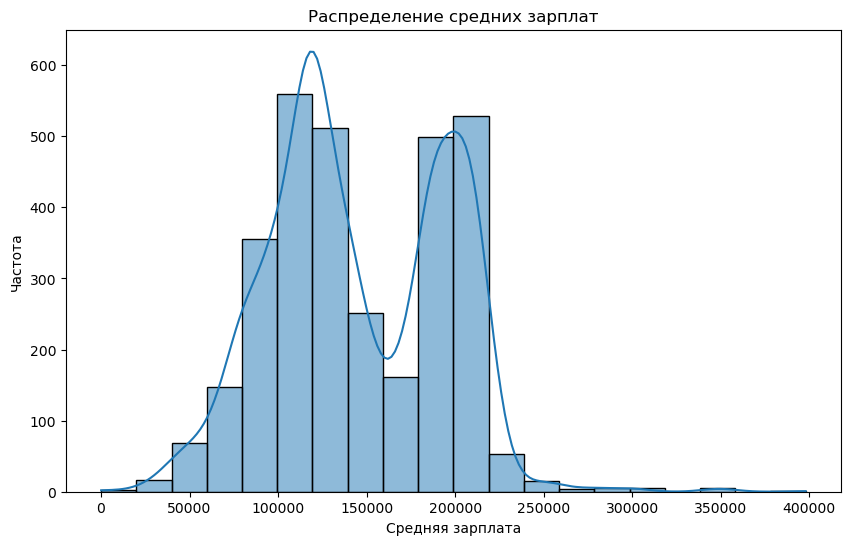

In [34]:
# визуализируем полученные показатели 
plt.figure(figsize=(10, 6))
sns.histplot(data=data_filled, x='avg_salary', bins=20, kde=True) # строим гистограмму

plt.title('Распределение средних зарплат')
plt.xlabel('Средняя зарплата')
plt.ylabel('Частота')

plt.show()

На гистограмме мы видим **бимодальное распределение***, объяснение этому лежит во втором пункте нашего исследовательского анализа. Мы выяснили, что самыми большими по количеству группами среди вакансий стали группы аналитиков с уровнем `Junior+` и `Middle`, поэтому бимодальность распределения объяснима.


**бимодальное распределение* -  это тип распределения данных, характеризующийся наличием двух различных пиков или мод (максимумов), на графике плотности вероятности. Это означает, что в наборе данных могут существовать две основные группы значений или две подгруппы, каждая из которых вносит значительный вклад в совокупный профиль распределения. 

Выделим среднюю зарплату для каждого грейда.

In [35]:
salary_by_grade = data_filled.groupby('grade')['avg_salary'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    salary_by_grade, 
	x='grade', 
	y='avg_salary', 
	title='Средняя зарплата аналитиков по грейду', 
	color='grade',
	width=1150,
	height=600,
    labels={'grade':'Грейд/ур-нь специалиста', 'avg_salary':'Средняя зарплата'}
)
fig.update_xaxes(tickangle=45)
fig.update_layout(showlegend=False)

# выводим диаграмму
fig.show()
salary_by_grade

,grade,avg_salary
0,Senior,202627.274082
1,Middle,193336.455065
2,Junior+,114629.872813
3,Junior,66888.818944


Собственно показатели графика очевидны, зарплата более опытных специалистов выше. Рассмотрим также сколько денег готовы выделять компании из нашего ТОПа на специалистов различного уровня. В качестве ориентира зарплаты мы возьмем значение из столбца `salary_to` как верхнюю границу зарплатной вилки.

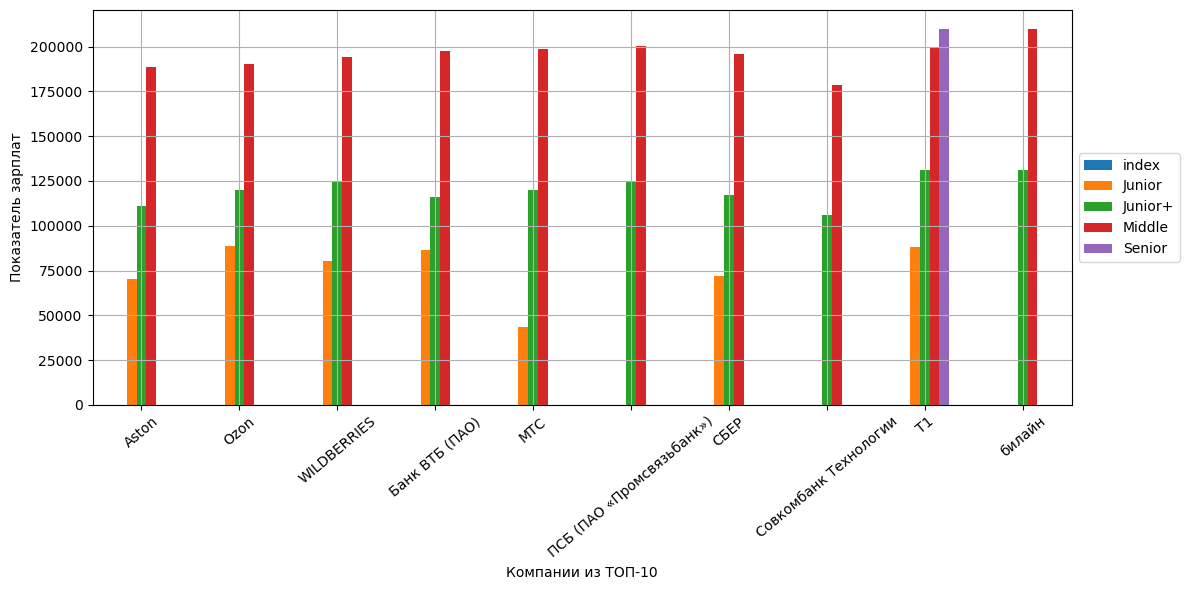

In [36]:
# Обновим переменную после обновления информации о зарплате
top_grades = data_filled[data_filled['employer'].isin(top10_employer['employer'])]

# строим таблицу распределения
result = top_grades.pivot_table(
	index='employer', 
	columns='grade', 
	values='salary_to', 
	aggfunc='mean'
)
result = result.reset_index()
result = result.reset_index()

# Визуализираум показатели
figsize = (12, 6)
ax = result.plot(
    kind='bar',
    x='employer',
    xlabel='Компании из ТОП-10',
    ylabel='Показатель зарплат',
    figsize=figsize,
	grid=True
)
plt.xticks(rotation=40)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Отобразить график
plt.tight_layout()  
plt.show()

**Вывод:** Не смотря на высокие показатели банка СБЕР в прошлых пунктах анализа, все таки по показателю средней заработной платы лидером становится компания T1, они готовы оплачивать работу специалистов с самым "разыскиваемым" грейдом выше большинства компаний из нашего ТОПа. Также, стоит сказать про компанию Билайн, показатель среднего чека для аналитиков уровня `Middle` у них больше 200 тыс. рублей. 
Также, мы выяснили, что разница в зарплатах для `Junior`,`Junior+` и специалистов более высокого уровня различается существенно. Так, средний показатель зп для специалиста с опытом от 1 до 3 лет будет около 114 тыс., а у специалиста уровня `Middle` среднее зп выше на 70/80 тыс. рублей.

#### Распределение по типу занятости
- расммотрим какой тип занятости переобладает в вакансиях
- выясним как тип занятости распределен по уровням кандидатов

In [37]:
# выделим группы
data_filled['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

4 типа занятости представленны в нашей таблице: `Полная занятость`, `Стажировка`, `Частичная занятость` и `Проектная работа`. Проилиструрем распределение.

In [38]:
# создаем таблицу
empl_cnt = data_filled.groupby('employment')['id'].count().sort_values(ascending=False
).reset_index()

# строим визуализацию
fig = px.bar(
	empl_cnt,
	x='employment', 
	y='id', 
	title='Распределение количества вакансий по типам занятости', 
	color='employment',
	width=1150,
	height=600,
    labels={'employment':'Тип занятости', 'id':'Количество вакансий'}
)
fig.update_layout(showlegend=False)

# выводим график
fig.show()

Формат полной занятости преобладает среди компаний. Посмотрим как это распределено по грйедам специалистов.

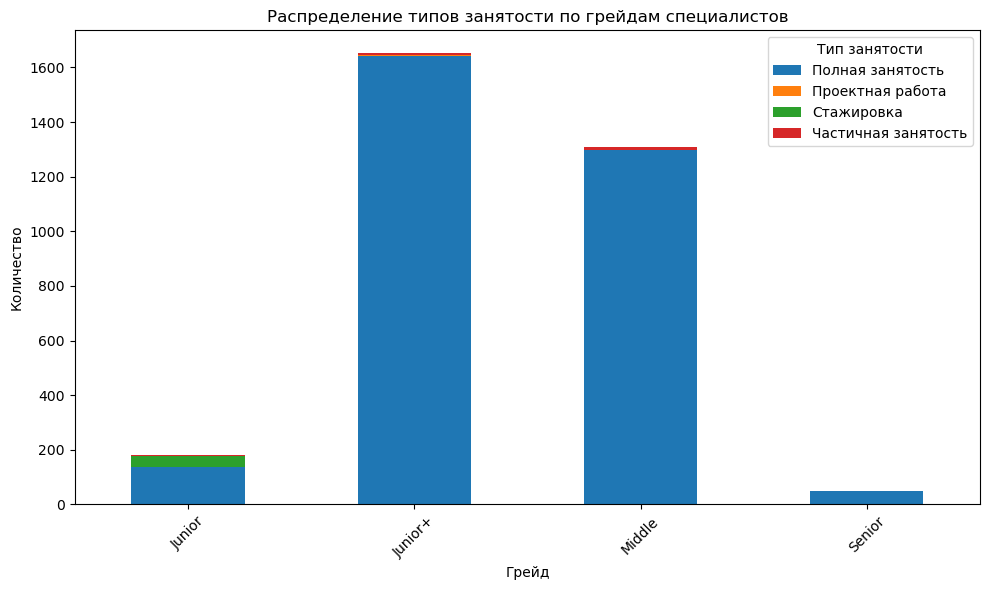

In [39]:
empl_by_grade = data_filled.pivot_table(index='grade', columns='employment', aggfunc='size', fill_value=0)

# строим график
empl_by_grade.plot(kind='bar', stacked=True, figsize=(10, 6))

# Настраиваем подписи графика
plt.title('Распределение типов занятости по грейдам специалистов')
plt.xlabel('Грейд')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Тип занятости')

# Показываем график
plt.tight_layout()
plt.show()

На общем фоне сильно выделяются показатели для аналитиков уровня `Junior`, поскольку формат стажировок расчитан именно на начинающих специалистов. Рассмотрим показатели в разрезе для аналитиков данных и для системных аналитиков.

In [40]:
# Обработаем данные для типа зан по уровням опыта
da_employment = {
    'Junior': data_filled[(
		data_filled['vac_group'] == 'Аналитик данных'
		) & (data_filled['grade'] == 'Junior')]['employment'].value_counts(), 

    'Junior+': data_filled[(
		data_filled['vac_group'] == 'Аналитик данных'
		) & (data_filled['grade'] == 'Junior+')]['employment'].value_counts(),

    'Middle': data_filled[(
		data_filled['vac_group'] == 'Аналитик данных'
		) & (data_filled['grade'] == 'Middle')]['employment'].value_counts(),

    'Senior': data_filled[(
		data_filled['vac_group'] == 'Аналитик данных'
		) & (data_filled['grade'] == 'Senior')]['employment'].value_counts(),
}

sa_employment = {
    'Junior': data_filled[(
		data_filled['vac_group'] == 'Системный аналитик'
		) & (data_filled['grade'] == 'Junior')]['employment'].value_counts(),

    'Junior+': data_filled[(
		data_filled['vac_group'] == 'Системный аналитик'
		) & (data_filled['grade'] == 'Junior+')]['employment'].value_counts(),

    'Middle': data_filled[(
		data_filled['vac_group'] == 'Системный аналитик'
		) & (data_filled['grade'] == 'Middle')]['employment'].value_counts(),

    'Senior': data_filled[(
		data_filled['vac_group'] == 'Системный аналитик'
		) & (data_filled['grade'] == 'Senior')]['employment'].value_counts(),
}
# Создаем общее количество подграфиков (4 для DA и 4 для SA)
fig = make_subplots(rows=2, cols=4, subplot_titles=('DA: Junior', 'DA: Junior+', 'DA: Middle', 'DA: Senior',
                                                     'SA: Junior', 'SA: Junior+', 'SA: Middle', 'SA: Senior'))

# Обработка и добавление графиков для DA
for i, (level, counts) in enumerate(da_employment.items()):
    fig.add_trace(
        go.Bar(x=counts.index, y=counts.values, name=level, marker=dict(color='blue')),
        row=1, col=i + 1
    )

# Обработка и добавление графиков для SA
for i, (level, counts) in enumerate(sa_employment.items()):
    fig.add_trace(
        go.Bar(x=counts.index, y=counts.values, name=level, marker=dict(color='green')),
        row=2, col=i + 1
    )
for row in [1,2]:
    for col in range(1,5):
        fig.update_xaxes(tickangle=45, row=row, col=col)

# Обновите параметры компоновки графиков
fig.update_layout(
    height=1000,  # увеличили высоту
    width=1100,   # увеличили ширину
    title_text='Количество вакансий по типу занятости и грейду',
    title_font=dict(size=18),  # уменьшили размер заголовка до 18
    barmode='group',
    legend_title_font_size=5,  # уменьшили размер легенды до 14
    font=dict(size=12),  # уменьшили размер шрифта до 12
    showlegend=True,
    margin=dict(l=50, r=50, t=50, b=100)  # немного уменьшили отступы
)

# Выводим график
fig.show()

Как для аналитиков данных, так и для системных аналитиков, самым распространенным типом занятости является полный день. Однако стоит сказать, что аналитиков данных уровня Junior+ куда больше свободы в этом вопросе, для них могут встречаться и стажировки, и формат частичной занятости. В остальном, все показатели похожи.

Выясним как охотно компании из нашего ТОПа готовы устраивать стажировки для начинающих аналитиков. Для этго построим график распределения типа занятости по компаниям из ТОП-10.

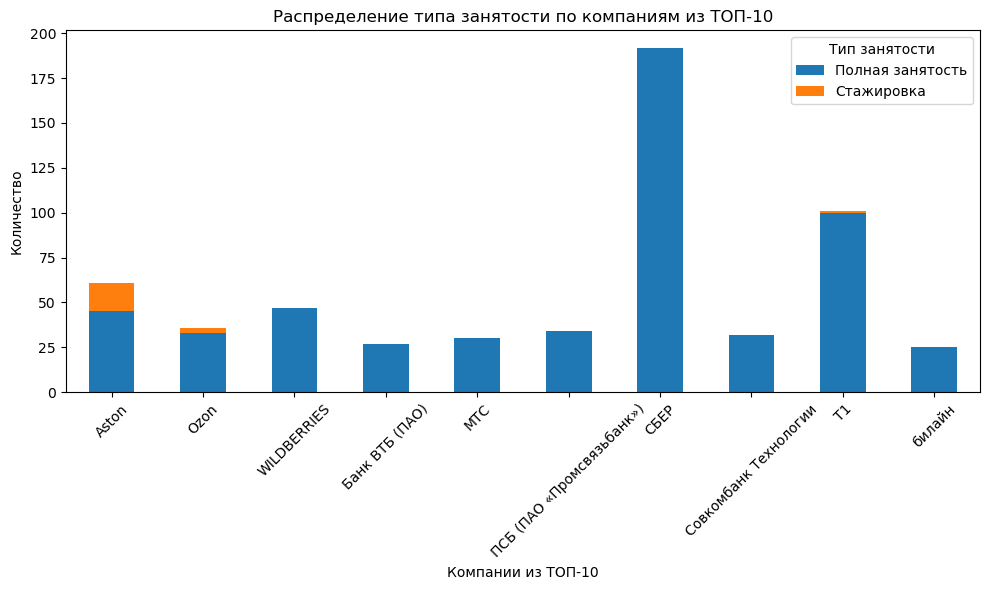

In [41]:
empl_by_employer = top_grades.pivot_table(index='employer', columns='employment', aggfunc='size', fill_value=0)

# строим второй график
empl_by_employer.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Распределение типа занятости по компаниям из ТОП-10')
plt.xlabel('Компании из ТОП-10')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Тип занятости')

plt.tight_layout()
plt.show()

**Вывод:** среди всех вакансий преобладающим типом занятости является `Полная занятость`, стажировки для начинающих специалистов могут себе позволить немногие компании(выделить можно только `Aston`, `Ozon` и `Т1`)

#### Распределение по **графику работы**

- рассмотрим какой график работы преобладает в вакансиях компаний
- выясним для какого уровня специалистов преобладает тот или иной график

In [42]:
# выделим группы
data_filled['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

У нас есть 4 указанные в вакансиях группы по графику работы: `Полный день`,`Удаленная работа`,`Гибкий график` и `Сменный график`. Построим график распределения количества вакансий по указанным группам.

In [43]:
# собираем таблицу
schedule_cnt = data_filled.groupby('schedule')['id'].count().sort_values(ascending=False).reset_index()

#строим график
fig = px.bar(
	schedule_cnt,
	x='schedule', 
	y='id', 
	title='Распределение количества вакансий по графику', 
	color='schedule',
	width=1150,
	height=600,
    labels={'schedule':'Тип графика', 'id':'Количество вакансий'}
)
fig.update_layout(showlegend=False)

# выводим график
fig.show()

Покажем распределение графика работы по грейдам специалистов и по компаниям, что бы понять какие типы графиков работы предпочитают компании из нашего ТОПа.

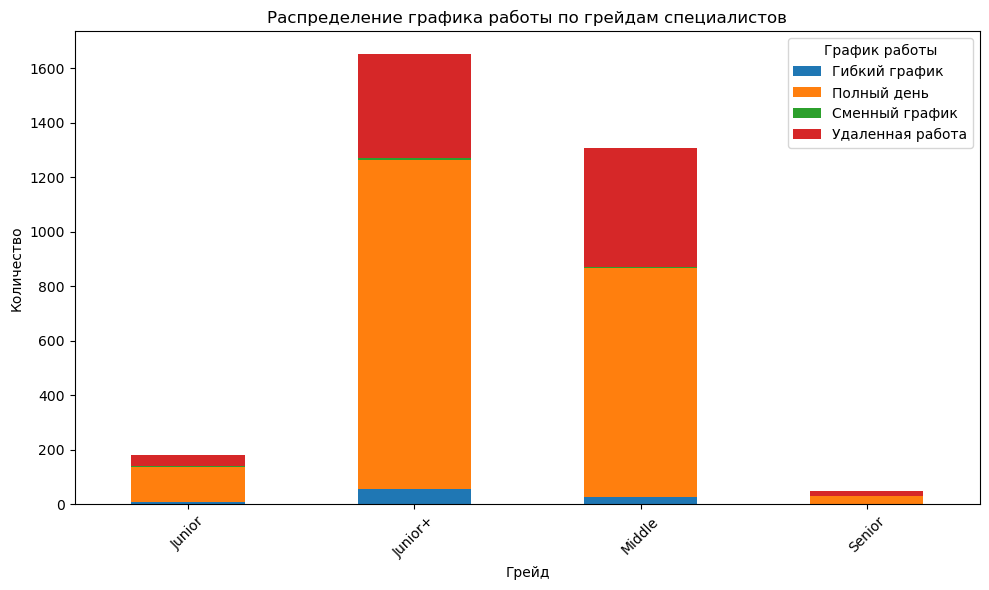

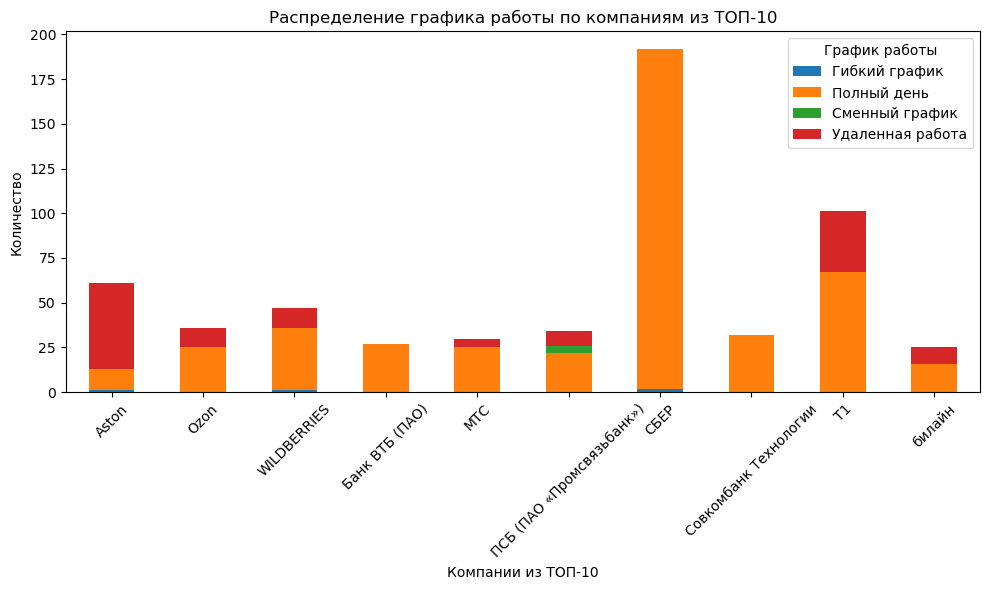

In [44]:
# строим таблицу
schedule_by_grade = data_filled.pivot_table(index='grade', columns='schedule', aggfunc='size', fill_value=0)

# строим график
schedule_by_grade.plot(kind='bar', stacked=True, figsize=(10, 6))

# Настраиваем подписи графика
plt.title('Распределение графика работы по грейдам специалистов')
plt.xlabel('Грейд')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='График работы')

# Показываем график
plt.tight_layout()
plt.show()


# строим вторую таблицу
schedule_by_employer = top_grades.pivot_table(index='employer', columns='schedule', aggfunc='size', fill_value=0)

# строим второй график
schedule_by_employer.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Распределение графика работы по компаниям из ТОП-10')
plt.xlabel('Компании из ТОП-10')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='График работы')

plt.tight_layout()
plt.show()

**Вывод:** среди всех вакансий преобладают два типа грфаика `Полный день` и `Удаленная работа`, эти же типы преобладают в разрезе для специалистов любого грейда, выделяется только то что для `Junior+` специалистов `Гибкий график` встречается чаще чем среди всех остальных грейдов.
Банки не склонны предоставлять кандидатам возможность работы удаленно, в то время как компании специализирующиеся на IT-услугах чаще готовы предоставлять такой график работы.

**Общий вывод по 3-ему пункту:**

- Мы выделили топ 10 компаний по количеству вакансий в таблице и выделили следующие группы компаний: банки, компании IT-специализации, маркетплейсы, компании моб.связи.  Все они больше заинтересованы в поиске специалистов уровня `Junior+` и `Middle`, однако начинающих специалистов  ищут банки(СБЕР, ВТБ), маркетплейсы (Ozon, Wildberries), компании моб.связи(МТС) и компании IT-специализации, конечно спрос на `Junior` невелик, но он есть. Самых же опытных специалистов из нашей таблицы пока требует  только компания T1. 

- По заработной плате показатель для специалистов уровня `Junior+` и `Middle` варьируется слабо (не путать с различиями в зп для этих грейдов - они различаются значительно). Идеальным местом для опытных "джунов" и "мидлов" могут стать компании Т1 и Билайн, показатели зп у них для этих грейдов самые высокие. Начинающим специалистам стоит присмотреться к компаниям Ozon, Банк ВТБ и Т1.

- Касаемо типа занятости и графика работы, то заключение для каждого грейда будет общее. В вакансиях преобладает (подавляющим большинством) полная занятость,  
По графику работы в основном стоит полный день, но есть шанс попасть на удаленную работу. Начинающим специалистам (`Junior`) также можно рассмотреть возможность стажировки, их предлагают компании Aston, Ozon и T1.


### 4.Определите,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

- Подсчитаем и сравним количество `hard_skills` и `soft_skills`, сгруппируем и визуализируем показатели по каждому грейду и специальности (аналитики данных vs системные аналитики)

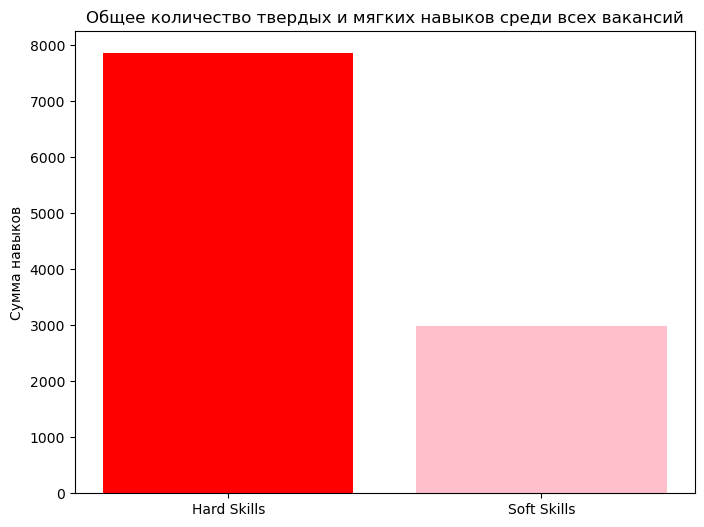

In [45]:
# Считаем общее количество твердых и мягких навыков используя показатели из `hard_skills_len` и `soft_skills_len`
total_hard_skills = data_filled['hard_skills_len'].sum()
total_soft_skills = data_filled['soft_skills_len'].sum()

# Построение столбчатой диаграммы
skills_count = {'Hard Skills': total_hard_skills, 'Soft Skills': total_soft_skills}
plt.figure(figsize=(8, 6))
plt.bar(skills_count.keys(), skills_count.values(), color=['red', 'pink'])
plt.title('Общее количество твердых и мягких навыков среди всех вакансий')
plt.ylabel('Сумма навыков')
plt.show()

Количество твердых навыков явно преобладает над количеством мягких навыков. Значит компании больше требуют от кандидата владения hard-skills.

Теперь исследуем средние показатели количества твердых и мягких скилов по уровни специалистов.

In [46]:
# создаем таблицу
grades_skills = data_filled.groupby('grade').agg({
    'hard_skills_len': 'mean',
    'soft_skills_len': 'mean'
}).reset_index()

# строим диаграмму
fig = px.bar(
    grades_skills,
    x='grade',
    y=['hard_skills_len', 'soft_skills_len'],
    barmode='group',
    labels={'value': 'Средний показатель навыков', 'grade': 'Ур-нь специалиста'},
    title='Средний показатель количества твердых и мягких навыков'
)

# вывод
fig.show()

Видна четкая зависимость количества требуемых твердых навыков (hard-skills) от уровня кандидата, чем выше уровень - тем больше навыков. Однако, на графике видно, что между спциалистами уровня `Junior` и `Junior+` разница в количестве требуемых твердых навыков совсем невелика, а вот мягких навыков от начинающего специалиста требуют больше (у начинающих аналитиков показатель среднего количества мягких навков самый высокий среди всех групп).

Рассмотрим показатели для каждой специальности отдельно:

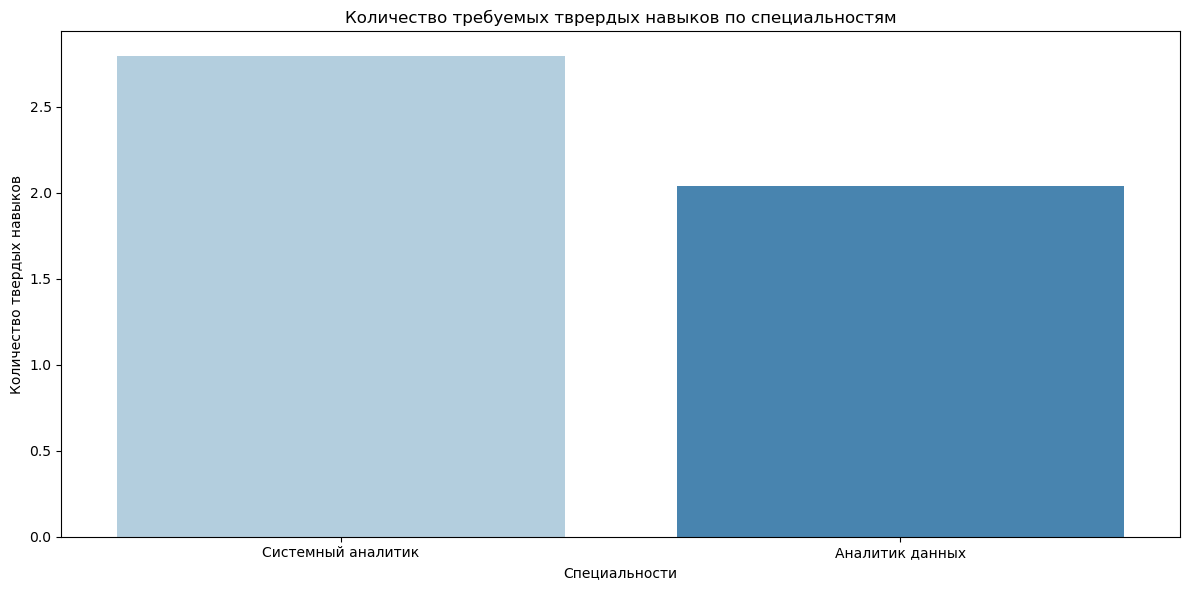

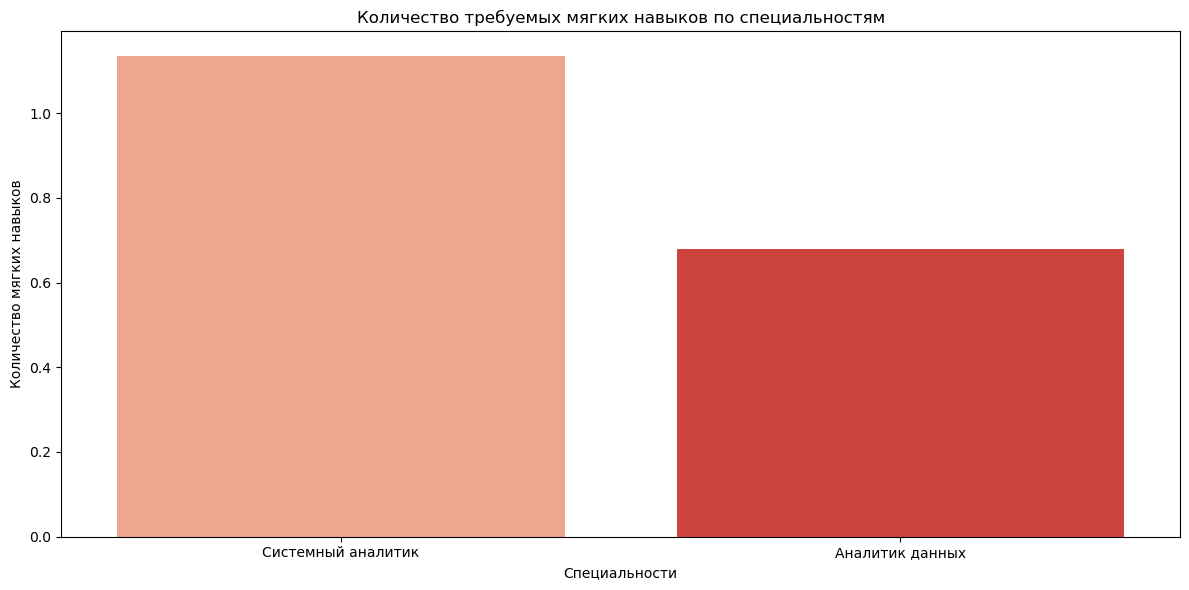

In [47]:
'''
в таблице уже есть столбец с указанией специальности для каждой вакансии,
поэтому перейдем сразу к визуализации,
сравнивать мы будем количество требуемых hard-skills для двух специальностей
и количество soft-skills для тех же специальностей 
'''

# Создание графика для твердых навыков
plt.figure(figsize=(12, 6))
sns.barplot(x='vac_group', y='hard_skills_len', data=data_filled, errorbar=None, palette='Blues')
plt.title('Количество требуемых тврердых навыков по специальностям')
plt.xlabel('Специальности')
plt.ylabel('Количество твердых навыков')
plt.tight_layout()
plt.show()

# Создание графика для мягких навыков
plt.figure(figsize=(12, 6))
sns.barplot(x='vac_group', y='soft_skills_len', data=data_filled, errorbar=None, palette="Reds")
plt.title('Количество требуемых мягких навыков по специальностям')
plt.xlabel('Специальности')
plt.ylabel('Количество мягких навыков')
plt.tight_layout()
plt.show()

**Вывод:** Твердых навыков в вакансиях запрашивают больше/чаще чем мягких. Чем выще грейд тем большим количеством твердых навыков необходимо владеть. Для системных аналитиков требуется больше навыков как твердых, так и мягких.

### 5. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим **параметрам**: самые важные hard-skils, самые важные soft-skils. *Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.*

Что бы выделить "важные" навыки нам прийдется подсчитать количество упоминаний каждого навыка в ячейках столбцов `hard_skills` и `soft_skills`. Мы сформируем группы со списками важных твердых и мягких навыков для каждого грейда каждой специальности. После построим графики для демонстрации результатов и выясним кто является наиболее желаемым кандидатом.

In [48]:
from collections import Counter

def count_skills(dataframe, skill_column, grade, role):
    # фильтруем данные для определенного грейда и специальности
    df_filtered = dataframe[(dataframe['grade'] == grade) & (dataframe['vac_group'] == role)]
    
    # извлекаем каждый навык
    skills = df_filtered[skill_column].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    
    # подсчитываем количество каждого навыка
    skills_flat = [skill.strip() for sublist in skills for skill in sublist]
    skill_counts = Counter(skills_flat)
    
    return skill_counts

In [49]:

# группа для аналитиков данных уровня junior 
junior_data_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Junior', 'Аналитик данных')
junior_data_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Junior', 'Аналитик данных')

# группа для системных аналитиков уровня junior
junior_system_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Junior', 'Системный аналитик')
junior_system_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Junior', 'Системный аналитик')

# группа для аналитиков данных уровня junior+
junior_plus_data_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Junior+', 'Аналитик данных')
junior_plus_data_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Junior+', 'Аналитик данных')

# группа для системных аналитиков уровня junior+
junior_plus_system_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Junior+', 'Системный аналитик')
junior_plus_system_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Junior+', 'Системный аналитик')

# группа для аналитиков данных уровня middle
middle_data_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Middle', 'Аналитик данных')
middle_data_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Middle', 'Аналитик данных')

# группа для системных аналитиков уровня middle
middle_system_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Middle', 'Системная аналитика')
middle_system_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Middle', 'Системная аналитика')

# группа для аналитиков данных уровня senior
senior_data_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Senior', 'Аналитик данных')
senior_data_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Senior', 'Аналитик данных')

# група для системных аналитиков уровня senior
senior_system_analyst_hard_skills = count_skills(data_filled, 'hard_skills', 'Senior', 'Системная аналитика')
senior_system_analyst_soft_skills = count_skills(data_filled, 'soft_skills', 'Senior', 'Системная аналитика')

Мы сформировали необходимые группы, можно переходить к визуализации показателей

In [50]:
# функция для визуализации каждой переменной
def plot_skill_distribution(hard_skill_counts, soft_skill_counts, top_hard_title, top_soft_title, top_n=10):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # график для hard skills
    hard_ax = axes[0]
    hard_ax.set_title(top_hard_title)
    # извлекаем `top_n`
    hard_top_skills = hard_skill_counts.most_common(top_n)
    hard_skill_names, hard_skill_counts = zip(*hard_top_skills)
    sns.barplot(ax=hard_ax, x=list(hard_skill_counts), y=list(hard_skill_names), palette='Blues_d')
    hard_ax.set_xlabel('Количество')
    hard_ax.set_ylabel('Навыки')
    
    # график для soft skills
    soft_ax = axes[1]
    soft_ax.set_title(top_soft_title)
    # извлекаем `top_n`
    soft_top_skills = soft_skill_counts.most_common(top_n)
    soft_skill_names, soft_skill_counts = zip(*soft_top_skills)
    sns.barplot(ax=soft_ax, x=list(soft_skill_counts), y=list(soft_skill_names), palette='Greens_d')
    soft_ax.set_xlabel('Количество')
    soft_ax.set_ylabel('Навыки')
    
    plt.tight_layout()
    
    # вывод
    plt.show()


График важных hard и soft навыков для **аналитика данных уровня Junior**

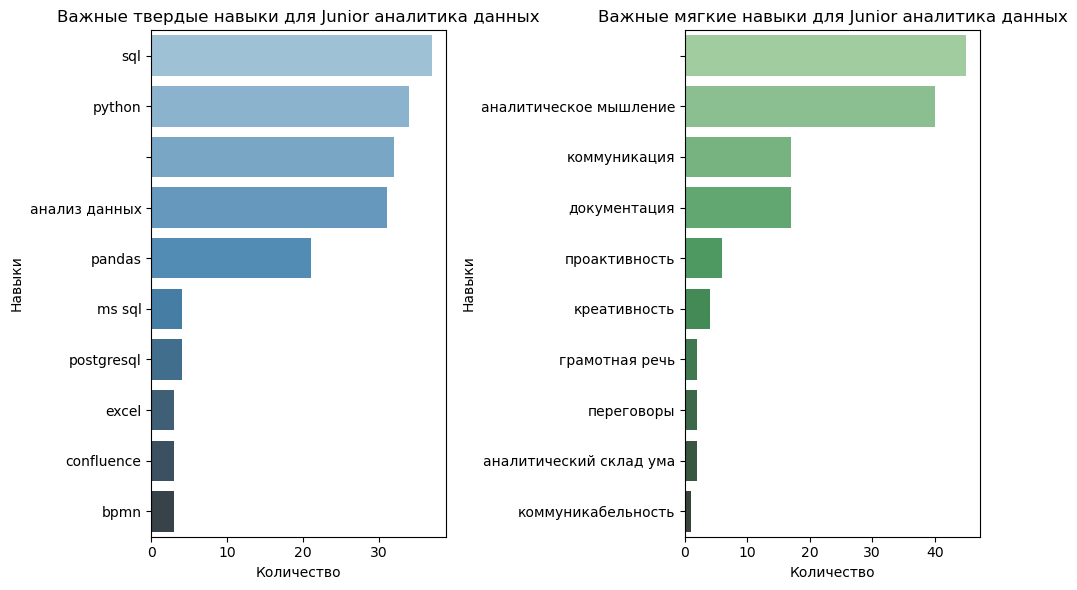

In [51]:
# применяем функцию для каждой переменной
plot_skill_distribution(
	junior_data_analyst_hard_skills, 
	junior_data_analyst_soft_skills, 
	'Важные твердые навыки для Junior аналитика данных',
	'Важные мягкие навыки для Junior аналитика данных'
)

График важных hard и soft навыков для **системных аналитиков уровня junior**.

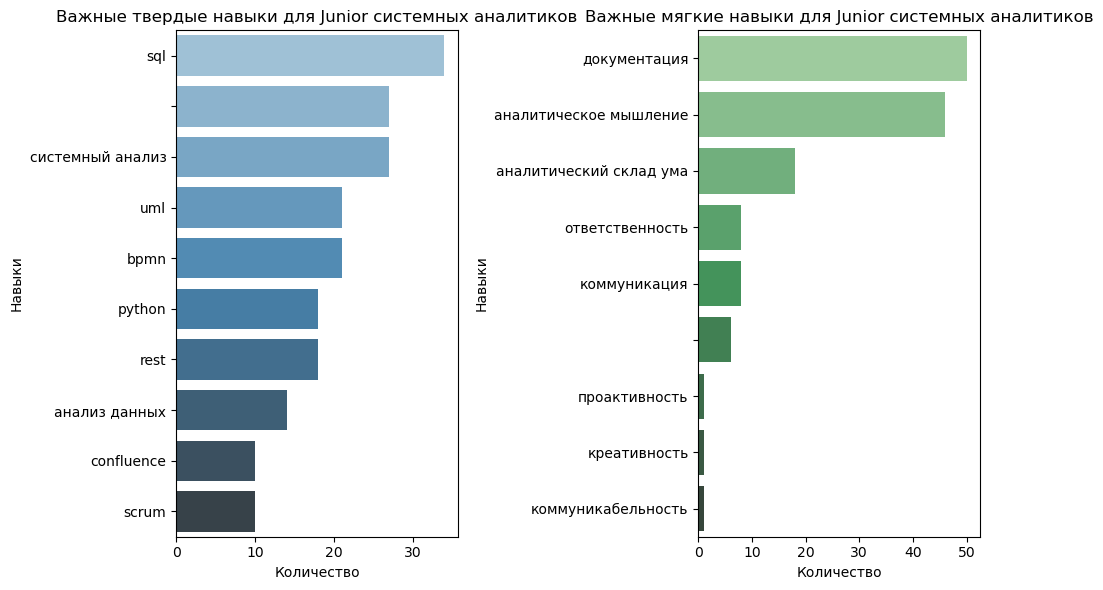

In [52]:
plot_skill_distribution(
	junior_system_analyst_hard_skills,
	junior_system_analyst_soft_skills,
	'Важные твердые навыки для Junior системных аналитиков',
	'Важные мягкие навыки для Junior системных аналитиков')

График важных hard и soft навыков для **аналитика данных уровня Junior+**

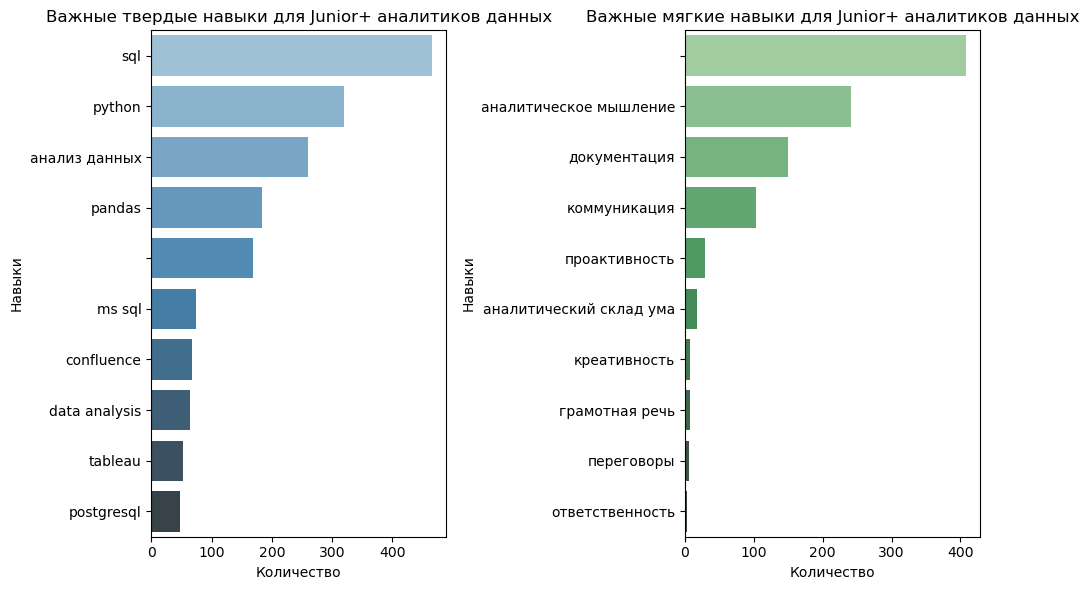

In [53]:
plot_skill_distribution(
	junior_plus_data_analyst_hard_skills,
	junior_plus_data_analyst_soft_skills,
	'Важные твердые навыки для Junior+ аналитиков данных',
	'Важные мягкие навыки для Junior+ аналитиков данных'
)

График важных hard и soft навыков для **системного аналитика уровня Junior+**

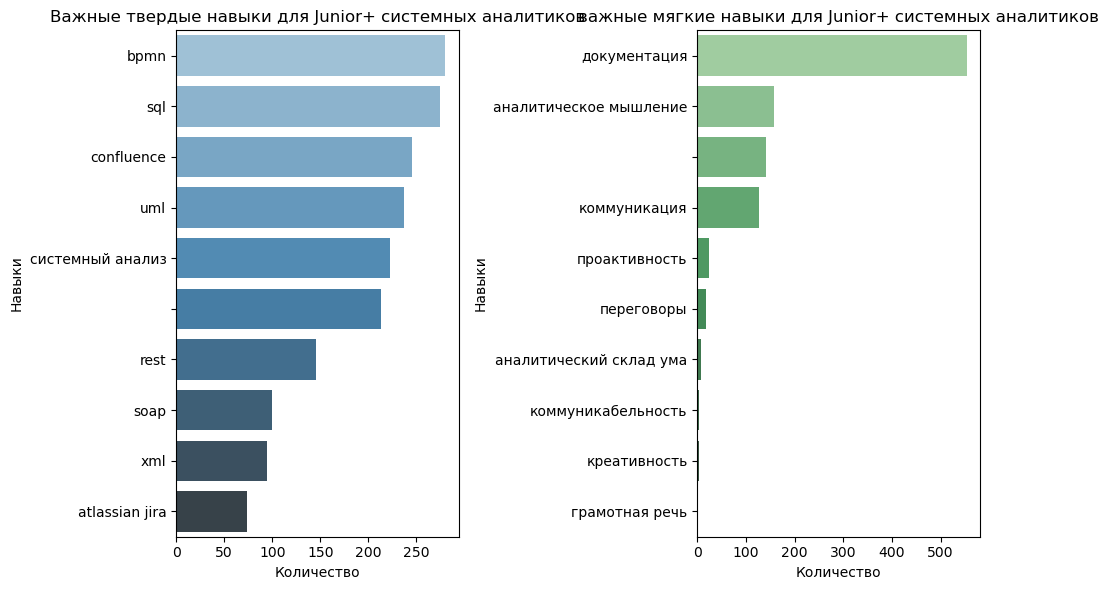

In [54]:
plot_skill_distribution(
	junior_plus_system_analyst_hard_skills,
	junior_plus_system_analyst_soft_skills,
	'Важные твердые навыки для Junior+ системных аналитиков',
	'важные мягкие навыки для Junior+ системных аналитиков'
)

График важных hard и soft навыков для **аналитика данных уровня Middle**

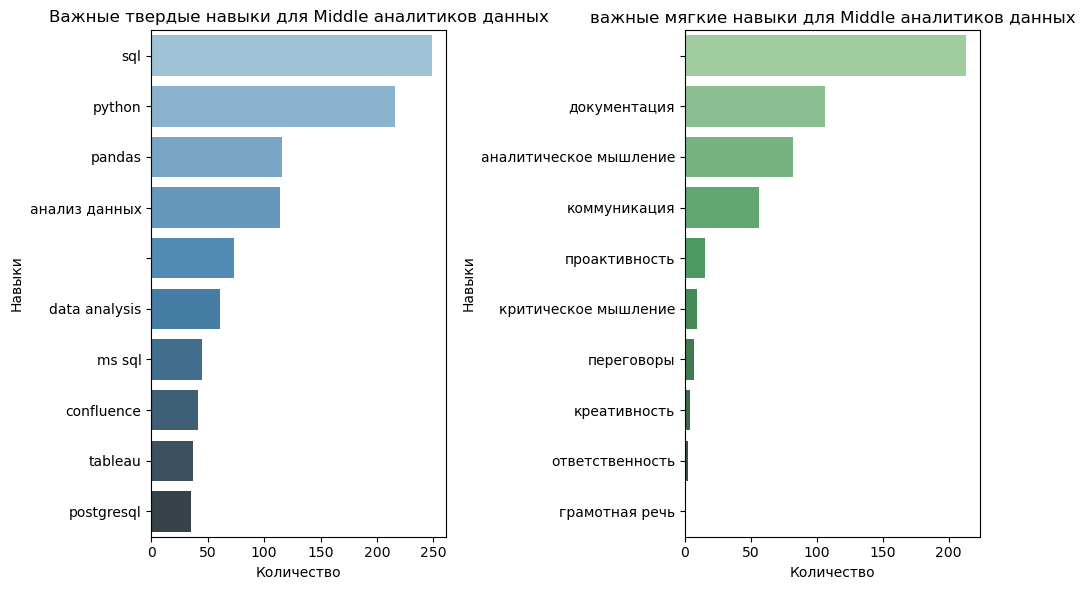

In [55]:
plot_skill_distribution(
	middle_data_analyst_hard_skills,
	middle_data_analyst_soft_skills,
	'Важные твердые навыки для Middle аналитиков данных',
	'важные мягкие навыки для Middle аналитиков данных'
)

График важных hard и soft навыков для **аналитиков данных уровня Senior**

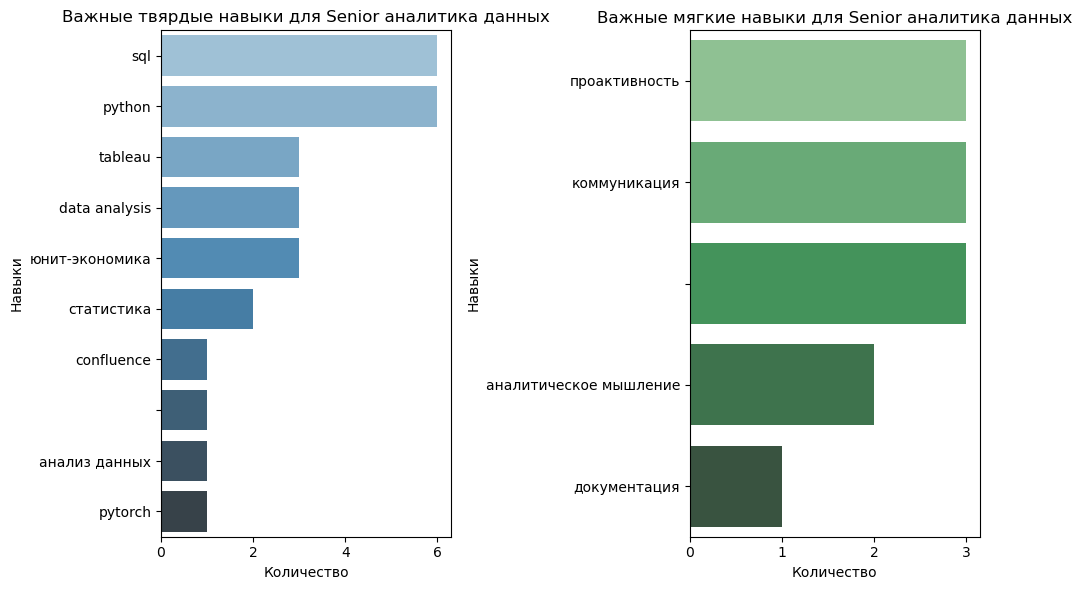

In [56]:
plot_skill_distribution(
	senior_data_analyst_hard_skills,
	senior_data_analyst_soft_skills,
	'Важные твярдые навыки для Senior аналитика данных',
	'Важные мягкие навыки для Senior аналитика данных'
)

**Вывод:** Для ряда категорий (`Middle` и `Senior` системных аналитиков) не удалось ваывести графики из-за ограниченного количества значений hard и soft навыков для этих категорий. 

Для обеих спецальностей каждого грейда можно выделить один навык, который мы назовев общим - SQL. Знание SQL является важным навыком как для аналитиков данных, так и для системных аналитиков. Для аналитиков данных каждого грейда можно выделить такие hard скилы как python (туда же входит pandas), sql, для senior можно выделить и знание Tableau. Среди мягких навыков для большинства грейдов выделяются `аналитическое мышление` и `знание документации` для грейда senior аналитиков данных чаще встречаются навыки `проактивность` и `коммуникация`.

## Формулирование выводов и рекомендаций.

### Общий вывод и рекомендации:

- *Анализ грейдов специалистов*:
  - На основе доступных данных, большая часть вакансий приходится на грейды Junior+ (52%) и Middle (41%). Вакансии для совсем начинающих специалистов уровня Junior занимают лишь 5.6%, и минимальной оказалась доля вакансий для Senior специалистов - всего 1.5%. Среди системных аналитиков наблюдается более высокая потребность в специалистах уровней Middle и Senior по сравнению с аналитиками данных. Рекомендуем работодателям балансировать открытые позиции, учитывая необходимости в специалистах более высокого уровня, чтобы покрыть потенциальные дефициты в опыте.

- *Типичное место работы для аналитиков*:
  - Ведущими работодателями для аналитиков данных и системных аналитиков оказались банки (особенно СБЕР), IT-компании, маркетплейсы и мобильные операторы. Несмотря на заметное количество вакансий от банков, по уровню предлагаемой зарплаты лидируют компании, такие как T1 и Билайн. Это указывает на необходимость для компаний рассмотреть предложения и условия трудоустройства, чтобы привлекать и удерживать квалифицированных специалистов.

- *Заработная плата и условия работы*:
  - Зарплаты для грейдов Junior+ и Middle демонстрируют небольшую вариацию между компаниями, однако различия по уровням значительные: зарплата Middle специалиста может превышать зарплату Junior+ на 70/80 тыс. рублей. T1 и Билайн представляют собой примеры компаний с конкурентоспособными зарплатами. Рекомендуем компании, особенно банки и маркетплейсы, обратить внимание на конкурентные предложения от IT-компаний и соответствующим образом адаптировать свои стратегии рекрутмента.

- *Тип занятости и график работы*:
  - Наиболее распространенным типом занятости остается полная занятость с тенденцией к удаленной работе или полному дню. Гибкий график находят в предложениях для специалистов Junior+ чаще. Начинающим стоит рассмотреть возможности стажировок, предлагаемых некоторыми компаниями. Это подчеркивает важность для фирм поддерживать гибкость условий труда, особенно в стремлении привлечь молодых специалистов.

- *Навыки и требования к кандидатам*:
  - Вакансии содержат больше требований к твердым навыкам (hard skills), чем к мягким (soft skills), и их количество увеличивается с повышением грейда. Например, знание SQL является основополагающим для обеих специализаций. Аналитику данных всех грейдов часто требуются навыки работы с Python и SQL, а для старших аналитиков (senior) важно владение Tableau. Среди soft skills для старших аналитиков выделяются такие качества как проактивность и коммуникабельность. Это указывает на необходимость для компаний четко формулировать и адаптировать список требований исходя из грейда, что обеспечит наиболее соответствующих кандидатов.

#### Для компаний:
- Определение требований к грейдам:
  - Большая часть вакансий приходится на специалистов уровней Junior+ и Middle, что свидетельствует о высоком спросе на работников с некоторым опытом, готовых к быстрому обучению и внедрению в рабочий процесс. Компании должны учитывать это при формулировании требований и предложений по заработной плате.

- Выбор типичного места работы:
  - Банки, такие как СБЕР, и IT-компании, такие как T1, являются основными работодателями. Компании должны изучить стратегии этих лидеров рынка, чтобы оставаться конкурентоспособными в привлечении молодых специалистов.
  Компании, предоставляющие удаленную или более гибкую занятость, могут привлечь больше кандидатов, особенно среди грейдов Junior+ и выше.

- Зарплатная политика:
  - Для привлечения высококвалифицированных специалистов уровня Middle и Senior, компаниям следует предлагать конкурентоспособные зарплаты, как это делают лидеры рынка, такие как T1 и Билайн.

- Учет востребованных навыков:
  - Компании должны точно формулировать требуемые навыки, уделяя особое внимание hard skills, таким как SQL и Python для аналитиков данных, и больше учитывать необходимость мягких навыков, особенно для системных аналитиков, которые требуют высоких коммуникационных и аналитических способностей.

#### Для кандидатов:
- Подход к развитию карьеры:
  - Стремитесь к уровню Junior+ или выше, укрепляя свои профессиональные навыки и увеличивая опыт работы. Эти уровни являются наиболее востребованными.Осознавайте важность сильных аналитических и мягких навыков, особенно для грейдов Middle и Senior.

- Таргетинг компаний:
  - Рассматривайте компании, такие как СБЕР, T1, и Билайн, как перспективные для трудоустройства. Они предлагают конкурентные условия, но также требуют высококвалифицированных специалистов.

- Фокус на навыки:
  - Развитие навыков SQL и Python является критически важным для аналитиков данных всех грейдов, при этом для опытных аналитиков может требоваться знание инструментов визуализации данных, таких как Tableau. Уделяйте внимание развитию таких мягких навыков, как проактивность и коммуникация, которые особенно востребованы для старших аналитиков данных.

- Узнавайте о зарплатных тенденциях:
  - Понимание текущих тенденций в зарплатах поможет лучше ориентироваться в предложениях и формировать ожидания относительно вашей будущей карьеры. Например, компания T1 предлагает одни из самых высоких зарплат для специалистов уровней Mid и Senior.

Соблюдение этих рекомендаций может значительно повысить шанс на успешное взаимодействие между работодателями и потенциальными сотрудниками, стимулируя развитие как компаний, так и карьеры кандидатов.